<h1 align="center"><strong>Project 4: Machine Learning</strong></h1>

<h2 align="center"><strong>Roderick L. Alabado</strong></h2>

<h3 align="center">BSIT-3A</h3>





In [18]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("datasets/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h1> Data Cleaning </h1>

In [8]:
# Keep only relevant columns
df = df[["Survived", "Pclass", "Sex", "Age"]]

# Drop missing values
df = df.dropna()

# Encode categorical column
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

df.head()


,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


<h1> Train-Test Split </h1>

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[["Pclass", "Sex", "Age"]]
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h1> Accuracy Test </h1>

In [11]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)


Model Accuracy: 0.7552447552447552


Interpretation

If accuracy > 0.60, the model is learning meaningful patterns.

Random Forest usually performs well even with small datasets.

<h1> Feature Importance </h1>

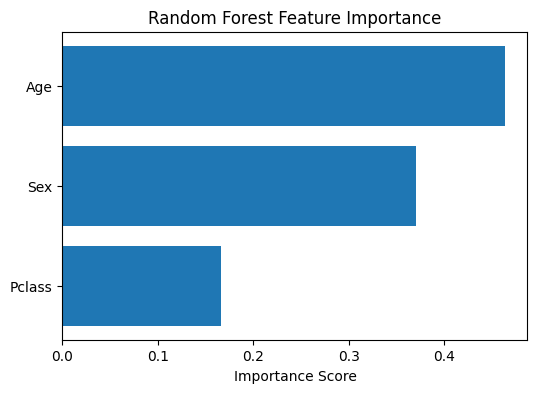

In [12]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Random Forest Feature Importance")
plt.show()


<h1> Confusion Matrix </h1>

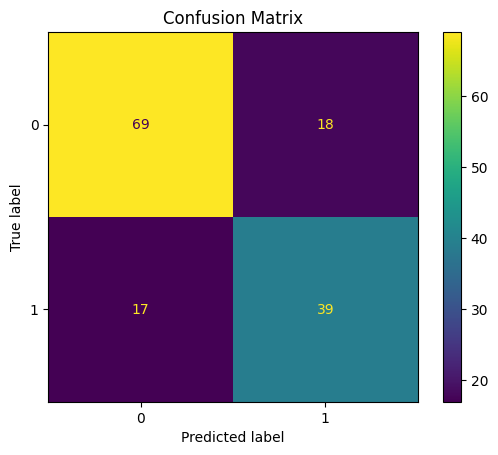

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


<h1> Practical Application Guide </h1>

| Value | Meaning                       |
| ----- | ----------------------------- |
| 1     | First Class – Rich passengers |
| 2     | Second Class – Middle class   |
| 3     | Third Class – Lower class     |


| Value | Meaning |
| ----- | ------- |
| 0     | Male    |
| 1     | Female  |


<h1> Sample Prediction </h1>

In [19]:
# Predict for a sample passenger
# Format: [Pclass, Sex, Age]

sample = [[3, 0, 22]]  # Example: 3rd class, male, age 22
prediction = model.predict(sample)

prediction


array([0])

<h2>Prediction 2 
 </h2>

In [20]:
model.predict([[1, 1, 55]])  # 1st class, Female, age 55


array([1])

<h1> Prediction 3 </h1>

In [21]:
# Additional passengers for prediction
# Format: [Pclass, Sex, Age]

samples = pd.DataFrame([
    [1, 0, 45],   # 1st class, Male, 45
    [1, 1, 30],   # 1st class, Female, 30
    [3, 0, 18],   # 3rd class, Male, 18
    [3, 1, 25],   # 3rd class, Female, 25
    [2, 0, 40],   # 2nd class, Male, 40
    [2, 1, 7],    # 2nd class, Female child, 7
], columns=["Pclass", "Sex", "Age"])

predictions = model.predict(samples)
samples["Survived_Prediction"] = predictions
samples


,Pclass,Sex,Age,Survived_Prediction
0,1,0,45,0
1,1,1,30,1
2,3,0,18,0
3,3,1,25,0
4,2,0,40,0
5,2,1,7,1


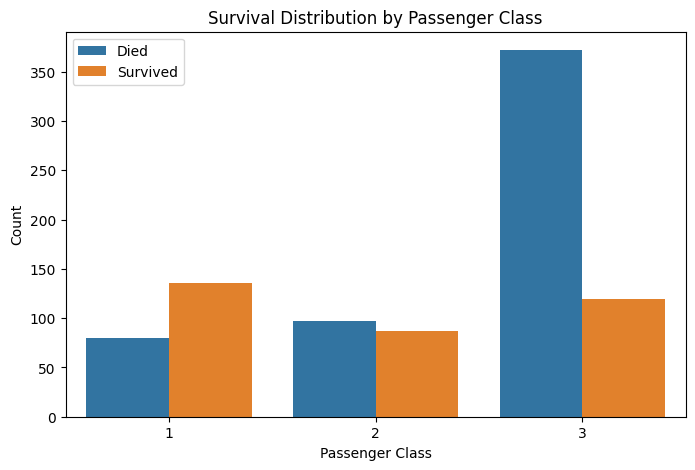

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(["Died", "Survived"])
plt.show()


1st class passengers have significantly higher survival rates.

3rd class passengers make up the largest group of fatalities.

This confirms that social class strongly influenced survival chances on the Titanic.

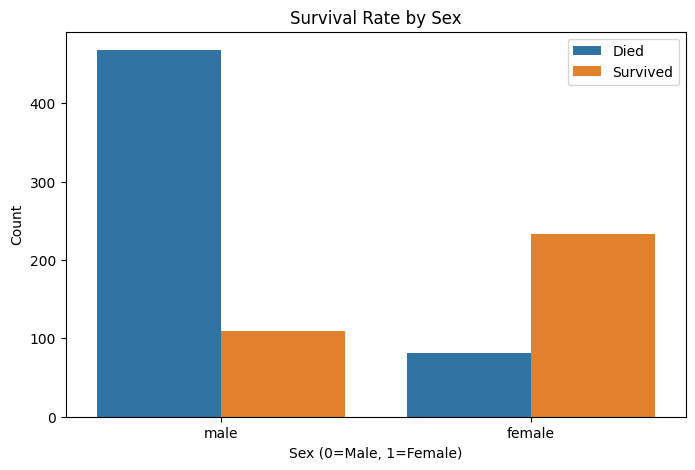

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival Rate by Sex")
plt.xlabel("Sex (0=Male, 1=Female)")
plt.ylabel("Count")
plt.legend(["Died", "Survived"])
plt.show()


Insights

Females have a very high survival rate.

Males have a much lower survival rate.

This clearly reflects the policy: “Women and children first.”